In [497]:
train=pd.read_csv("../titanic/train.csv")
test=pd.read_csv("../titanic/test.csv")

In [379]:
train.head()
test.head() #PassengerId starts with  num 892
train.shape #891,12
test.shape #418,11
train.info()
test.info()
train.isnull().sum()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [381]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [383]:
#범주형 -> bar chart
def barchart(f):
    survived = train[train['Survived']==1][f].value_counts()
    dead =train[train['Survived']==0][f].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index=['Survived','Dead'] #인덱스 이름 부여
    df.plot(kind='bar', figsize=(8,5), stacked=True)
    plt.xticks(rotation = 0)

남성이 더 많이 죽었다


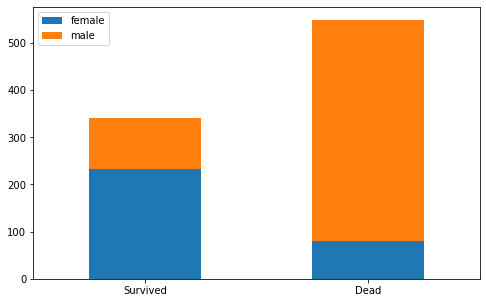

In [385]:
barchart('Sex') #성별에 따른 생존자/사망자 시각화

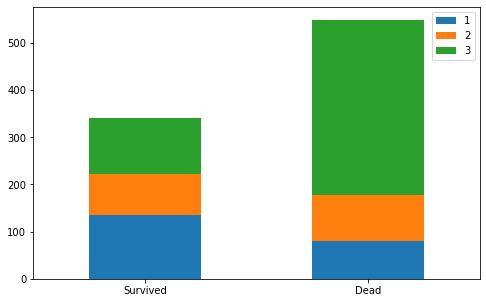

In [387]:
barchart('Pclass')

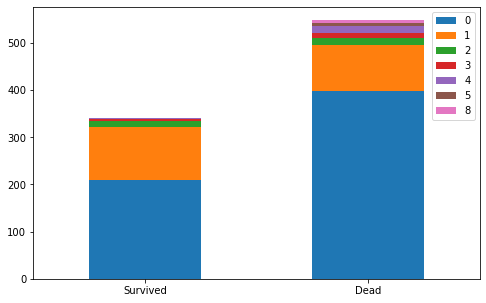

In [389]:
barchart('SibSp')

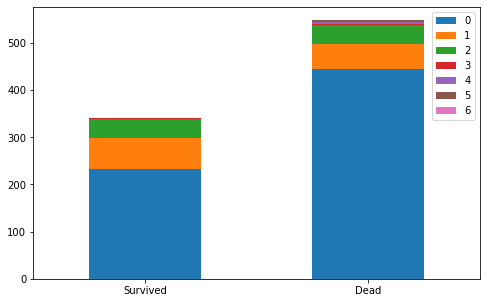

In [391]:
barchart('Parch')

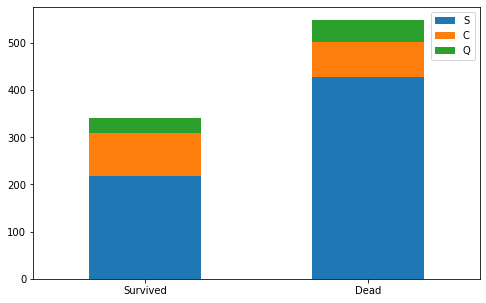

In [393]:
barchart('Embarked')

특성공학 : 머신러닝을 위한 데이터 전처리


In [499]:
trainTestData=[train, test]
trainTestData

for d in trainTestData:
    d['title']=d['Name'].str.extract(" ([A-Za-z]+)\.")
#공백 다음에 소괄호, 소괄호 내부에는 영문자 1글자 이상, 마지막 글자는 점(.)으로 끝나야함

In [500]:
train['title'].value_counts()
test['title'].value_counts()
#Mr:0 , Miss:1, Mrs:2, Other:3


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: title, dtype: int64

In [501]:
tm={"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Rev":3,"Col":3,"Dona":3,"Dr":3, "Ms":3, "Mlle":3,"Countess":3, "Don":3,"Jonkheer":3, "Lady":3, "Sir":3, "Major":3, "Capt":3, "Mme":3}
for data in trainTestData:
    data['title']=data['title'].map(tm)

In [502]:
train['title'].value_counts()
test['title'].value_counts()

0    240
1     78
2     72
3     28
Name: title, dtype: int64

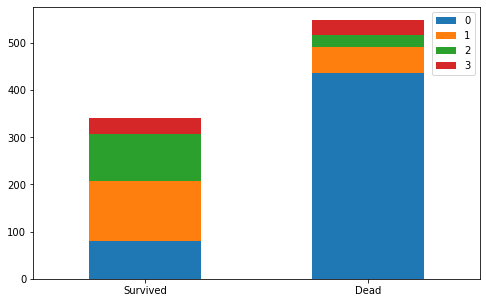

In [503]:
barchart('title')

In [504]:
train.drop('Name',axis=1, inplace=True)


In [505]:
test.drop('Name',axis=1, inplace=True)

In [506]:
tm={"male":0, "female":1}
for data in trainTestData:
    data['Sex']=data["Sex"].map(tm)


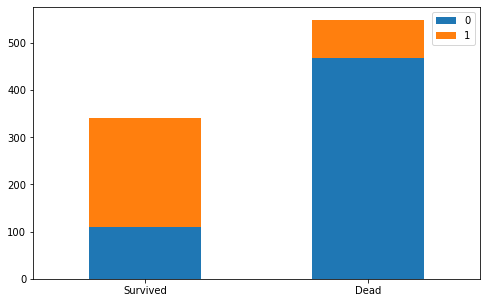

In [507]:
barchart('Sex')

In [508]:
train.groupby("title")['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [509]:
train['Age'].fillna(train.groupby("title")['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby("title")['Age'].transform('median'), inplace=True)
#Mr호칭, 나이 Nan-> Mr의 나이 중간값 NaN 대체 이런식
#호칭에 따라 나이 평균값을 다르게 넣는다 

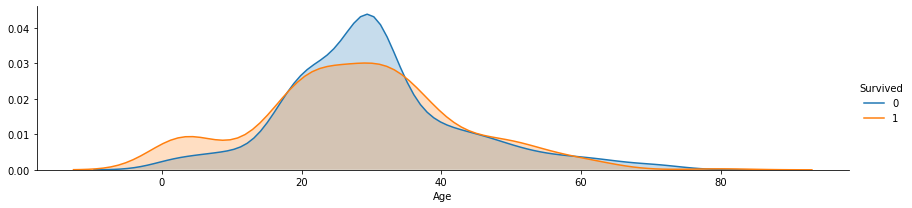

In [510]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
#FacetGrid 다중 플랏 그리드를 구성~
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

(0.0, 20.0)

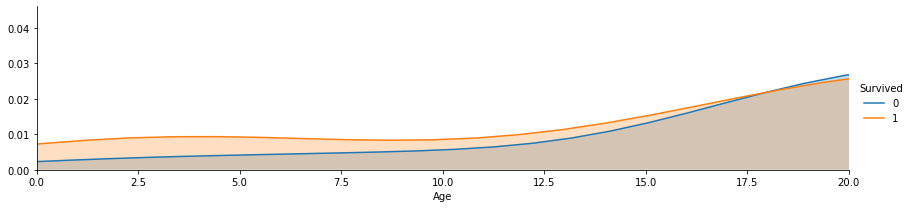

In [511]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
#FacetGrid 다중 플랏 그리드를 구성~
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()
plt.xlim(0,20)

In [512]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [513]:
for data in trainTestData:
    data.loc[data['Age']<=16,'Age']=0, #age가 16세 이하인 경우 0으로 처리
    data.loc[(data['Age']>16)&(data['Age']<=26),'Age']=1,
    data.loc[(data['Age']>26)&(data['Age']<=36),'Age']=2,
    data.loc[(data['Age']>36)&(data['Age']<=62),'Age']=3,
    data.loc[data['Age']>62,'Age']=4

In [514]:
#plotly, tableau
#Pclass 가 12,3인 승객이 승선한 항구별(Embarked) 승객수 출력
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()


In [515]:
df= pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class','2nd class','3rd class']

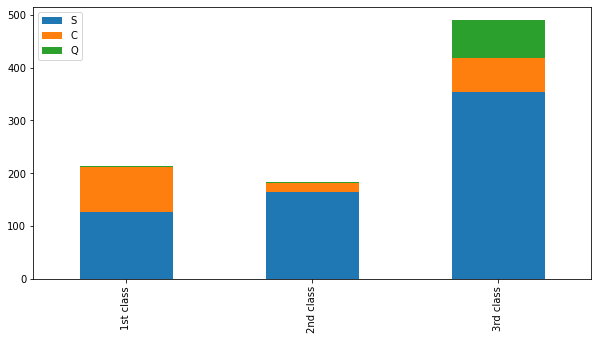

In [516]:
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [517]:
train['Embarked']=train['Embarked'].fillna('S')

#연습문제 : Fare 로 추정하여 승선도시 값을 채우기

In [518]:
 tm={"S":0,"C":1,"Q":2}
 for data in trainTestData:
     data['Embarked']=data['Embarked'].map(tm)

In [519]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [520]:
test[test['Fare'].isnull()]
#어떤 값으로 채워주는 것이 좋을까?

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
152,1044,3,0,3.0,0,0,3701,NaN,NaN,0,0


In [521]:
# test.groupby(['Embarked'])['Pclass'].mean()
test.groupby(['Embarked','Pclass'])['Fare'].mean()
test['Fare']=test['Fare'].fillna(test.groupby(['Embarked','Pclass'])['Fare'].mean()[0][3])

(0.0, 30.0)

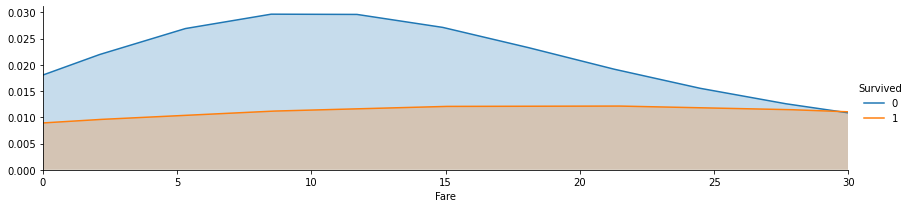

In [522]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
#FacetGrid 다중 플랏 그리드를 구성~
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

In [523]:
for data in trainTestData:
    data.loc[data['Fare']<=17,'Fare']=0, 
    data.loc[(data['Fare']>17)&(data['Fare']<=30),'Fare']=1,
    data.loc[(data['Fare']>30)&(data['Fare']<=100),'Fare']=2,
    data.loc[(data['Fare']>100),'Fare']=3

In [524]:
train['Fare'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

In [525]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
A6             1
B101           1
B3             1
C45            1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

In [526]:
for data in trainTestData:
    data["Cabin"]=data.Cabin.str[:1]

In [527]:

train['Cabin']


0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [528]:
# Train Pclass가 1인 Cabin column 값 종류별개수 출력
Pclass1=train[train.Pclass==1]['Cabin'].value_counts()
Pclass2=train[train.Pclass==2]['Cabin'].value_counts()
Pclass3=train[train.Pclass==3]['Cabin'].value_counts()

In [529]:
Pclass3

F    5
G    4
E    3
Name: Cabin, dtype: int64

In [530]:
df = pd.DataFrame([Pclass1,Pclass2, Pclass3])
df.index=["1st class","2nd class","3rd class"]
df

,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

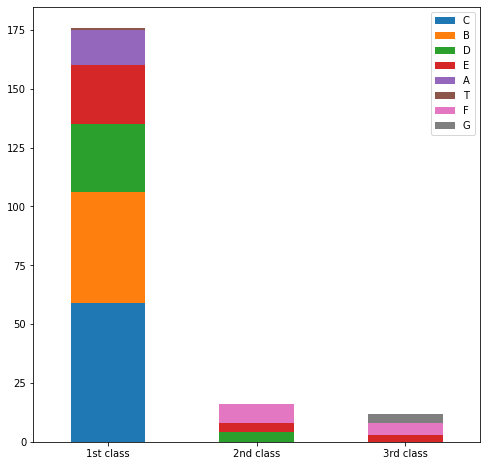

In [531]:
df.plot(kind='bar', stacked=True, figsize=(8,8))
plt.xticks(rotation = 0)

In [532]:
tm={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8} #T값 변경 필요
for data in trainTestData:
    data['Cabin']=data['Cabin'].map(tm)

__Pclass 별로 그룹화, 그룹별로 cabin 열 값에 대한 중앙값으로 결측값을 대체(train, test)__

In [533]:
#Cabin의 널값이 아주아주 많은..... 
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [534]:
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [535]:
train['FamilySize']= train['SibSp']+train['Parch']+1
test['FamilySize']= test['SibSp']+test['Parch']+1

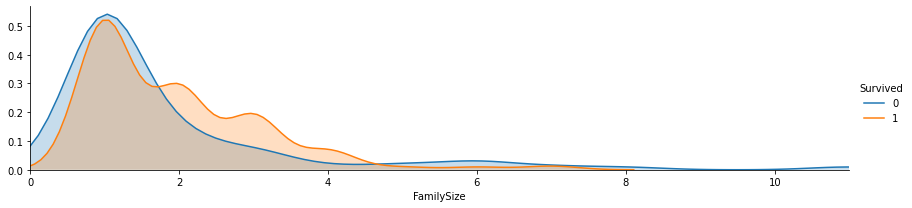

In [536]:
facet=sns.FacetGrid(train, hue='Survived', aspect=4)
#FacetGrid 다중 플랏 그리드를 구성~
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()

In [537]:
tm={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6, 11:4.0} #T값 변경 필요
for data in trainTestData:
    data['FamilySize']=data['FamilySize'].map(tm)

In [538]:
train.info()
train = train.drop(['Ticket', 'SibSp', 'Parch'], axis=1)
test = test.drop(['Ticket', 'SibSp', 'Parch'], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  title        891 non-null    int64  
 12  FamilySize   891 non-null    float64
dtypes: float64(4), int64(8), object(1)
memory usage: 90.6+ KB


In [539]:
train = train.drop(['PassengerId'], axis=1)
trainData=train.drop(['Survived'], axis=1)
target = train['Survived']

In [540]:
trainData.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'title',
       'FamilySize'],
      dtype='object')

In [541]:
trainData

,Pclass,Sex,Age,Fare,Cabin,Embarked,title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1.0,1.0,0.4,0,1,0.0
888,3,1,1.0,1.0,2.0,0,1,1.2
889,1,0,1.0,1.0,0.8,1,0,0.0


In [542]:
#CrossValidation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np 
from sklearn.model_selection import KFold, cross_val_score

In [543]:
kfold=KFold(n_splits=10, shuffle= True, random_state=42)

In [557]:
#KNN
clf=KNeighborsClassifier(n_neighbors=11)
score= cross_val_score(clf, trainData, target, cv=kfold, n_jobs=1, scoring='accuracy')
np.mean(score) #0.8327715355805244

0.8327715355805244

In [545]:
testData=test.drop("PassengerId", axis=1).copy()

In [546]:
#clf.predict(testData)

In [547]:
#의사결정나무
clf=DecisionTreeClassifier()
score= cross_val_score(clf, trainData, target, cv=kfold, n_jobs=1, scoring='accuracy')
np.mean(score) #0.79458177278402

0.7923345817727839

In [569]:
#랜덤 포레스트
clf=RandomForestClassifier(n_estimators=51, max_depth=6, random_state=0)
score= cross_val_score(clf, trainData, target, cv=kfold, n_jobs=1, scoring='accuracy')
np.mean(score) 

0.8327340823970036

In [549]:
#나이브 베이즈
clf=GaussianNB()
score= cross_val_score(clf, trainData, target, cv=kfold, n_jobs=1, scoring='accuracy')
np.mean(score) 

0.7845193508114856

In [553]:
#SVM
clf=SVC()
score= cross_val_score(clf, trainData, target, cv=kfold, n_jobs=1, scoring='accuracy')
np.mean(score) 

0.8327465667915105

In [558]:
clf.fit(trainData, target)
prediction=clf.predict(testData)

In [559]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [560]:
res=pd.DataFrame({
    'PassengerId':test['PassengerId'],
    'Survived':prediction
})

In [561]:
res.to_csv('result2.csv', index= False)